In [82]:
import numpy as np
import matplotlib.pyplot as plt


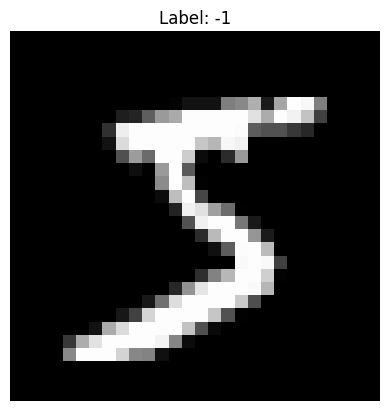

In [83]:

# Load the data from MNIST-5-6-Subset.txt
# Change the path as needed
data_file_path = "MNIST-5-6-Subset.txt"
data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)
# Load the labels from MNIST-5-6-Labels.txt
# Change the path as needed
labels_file_path = "MNIST-5-6-Subset-Labels.txt"
labels = np.loadtxt(labels_file_path)
# Assuming you want to visualize the first image

# Index changed
indicator_labels = (labels-5)*2-1

image_index = 0
image_data = data_matrix[image_index]
selected_label = int(indicator_labels[image_index])
# Visualize the image using Matplotlib
# We transpose the image to make the number look upright.
plt.imshow(image_data.reshape(28,28).transpose(1,0), cmap='gray')
plt.title(f"Label: {selected_label}")
plt.axis('off') # Turn off axis
plt.show()

In [132]:
def knn(training_points, training_labels, test_points, test_labels):
    m = training_points.shape[1]
    n = test_points.shape[1]
    
    training_dot_training = np.dot(np.transpose(training_points), training_points)
    
    training_dot_test = np.matmul(training_points, np.transpose(test_points))
    test_dot_test = np.dot(np.transpose(test_points), test_points)
    
    # Formula from assignment text
    fst_part = np.matmul(np.diag(training_dot_training), np.transpose(np.ones(n)))
    snd_part = 2 * training_dot_test
    trd_part = np.dot(np.transpose(np.ones(m)), np.transpose(np.diag(test_dot_test)))
    
    distances = (fst_part - snd_part + trd_part)
    indices = np.argsort(distances)
    # print(f"distance {distances}, shape: {distances.shape}")
    # print(f"indices {indices}, shape: {indices.shape}")
    
    # print(training_labels.shape)
    # print(indices.shape)
    
    Y = training_labels[indices]
    
    
    print(np.sign(np.cumsum(Y)))

    
    
    

In [ ]:
# Subset of the data is selected for training:
m = 50

training_data = data_matrix[3:m]
training_labels = indicator_labels[2:m]

testing_data = data_matrix[0:1]
testing_labels = indicator_labels[0:1]

print(training_data.shape)
print(testing_data.shape)

knn(training_data, training_labels, testing_data, testing_labels)


(48, 784)
(1, 784)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
